# RandomForest but with Rule (AQ algorithm)

Sample datasets are in the `example_data` folder

## Dataset: `student-alcohol_uma.csv`

### Loading the needed libraries

In [ ]:
import sys
!{sys.executable} -m pip install -r requirements.txt

In [3]:
import numpy as np
from core.forest import Forest
from sklearn.model_selection import KFold
from sklearn import metrics
import matplotlib.pyplot as plt
from tqdm import tqdm

### Training and testing

In [ ]:
all_stats = []

data = np.genfromtxt(fname="example_data/student-alcohol_uma.csv", delimiter=";", dtype=str)
X, y = data[:,:30], data[:,30:]

for _ in range(5):
    cv = KFold(n_splits=10, shuffle=True)
    for train_ix, test_ix in cv.split(X):
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        forest = Forest(n_tree=20, train_x=X_train, train_y=y_train)
        score = []
        results = []
        print("Testing...")
        for test_x in tqdm(X_test):
            result, prec = forest.predict(test_x)
            results.append(result.tolist())
            score.append(prec)

        test_y = y_test

        stats = {}
        stats["acc"] = metrics.accuracy_score(test_y, results)
        stats["cm"] = metrics.confusion_matrix(test_y,results)

        all_stats.append(stats)
    

In [5]:
def stats(dict_list, key):
    list = [el[key] for el in dict_list]
    np_list = np.array(list)
    return np.mean(np_list), np.std(np_list)

def get_min_and_max(dict_list, key):
    list = [el[key] for el in dict_list]
    return list.index(min(list)), list.index(max(list))


### Result

In [6]:
#mean and std for acc
stats(all_stats, "acc")

(0.30678205128205127, 0.06945264658991186)

In [7]:
#worst and best index by acc
min_v, max_v = get_min_and_max(all_stats, "acc")

In [8]:
all_stats[min_v]

{'acc': 0.175,
 'cm': array([[ 0,  0,  1,  0,  3],
        [ 0,  0,  1,  0,  2],
        [ 2,  1,  1,  1, 12],
        [ 0,  0,  2,  0,  3],
        [ 1,  0,  2,  2,  6]], dtype=int64)}

In [9]:
all_stats[max_v]

{'acc': 0.5384615384615384,
 'cm': array([[ 1,  0,  0,  0,  2],
        [ 0,  0,  1,  0,  2],
        [ 0,  1,  4,  0,  4],
        [ 2,  0,  2,  1,  2],
        [ 1,  0,  1,  0, 15]], dtype=int64)}

### Confusion Matrix for worst and best

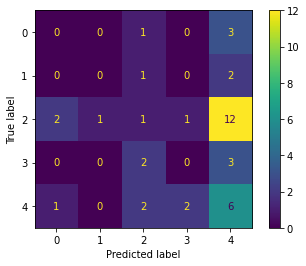

In [10]:
pcm = metrics.ConfusionMatrixDisplay(confusion_matrix=all_stats[min_v]["cm"])
pcm.plot()
plt.show()

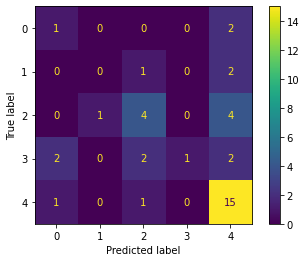

In [11]:
pcm = metrics.ConfusionMatrixDisplay(confusion_matrix=all_stats[max_v]["cm"])
pcm.plot()
plt.show()